In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
df.shape

(10324, 33)

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287


In [ ]:
# List of date columns
date_columns = [
    'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
    'Scheduled Delivery Date', 'Delivered to Client Date',
    'Delivery Recorded Date'
]

# Convert '/' to '-' and parse as datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col].astype(str).str.replace('/', '-', regex=False), errors='coerce')

# Check conversion
df[date_columns].dtypes


<ipython-input-13-95fe7ba9665e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col].astype(str).str.replace('/', '-', regex=False), errors='coerce')
<ipython-input-13-95fe7ba9665e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col].astype(str).str.replace('/', '-', regex=False), errors='coerce')
<ipython-input-13-95fe7ba9665e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col].astype(str).str.replace('/', '-', regex=False), errors='coerce')
<ipython-input-13-95fe7ba9665e>:10: User

,0
PQ First Sent to Client Date,datetime64[ns]
PO Sent to Vendor Date,datetime64[ns]
Scheduled Delivery Date,datetime64[ns]
Delivered to Client Date,datetime64[ns]
Delivery Recorded Date,datetime64[ns]


In [ ]:
# Columns suspected to be numeric but stored as strings
numeric_columns = ['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df[numeric_columns].describe()


,Weight (Kilograms),Freight Cost (USD),Line Item Value
count,6372.000000,6198.000000,1.032400e+04
mean,3424.441306,11103.234819,1.576506e+05
std,13526.968270,15813.026692,3.452921e+05
min,0.000000,0.750000,0.000000e+00
25%,206.750000,2131.120000,4.314593e+03
50%,1047.000000,5869.655000,3.047147e+04
75%,3334.000000,14406.570000,1.664471e+05
max,857354.000000,289653.200000,5.951990e+06


In [ ]:
# Fill some columns with default values
df['Shipment Mode'].fillna('Unknown', inplace=True)
df['Dosage'].fillna('Unknown', inplace=True)
df['Line Item Insurance (USD)'].fillna(0, inplace=True)

# Drop rows if critical columns like 'PO Sent to Vendor Date' or 'Delivered to Client Date' are missing
df.dropna(subset=['PO Sent to Vendor Date', 'Delivered to Client Date'], inplace=True)


<ipython-input-15-a6115dee145b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shipment Mode'].fillna('Unknown', inplace=True)
<ipython-input-15-a6115dee145b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Apply strip() to all object columns
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            4592 non-null   int64         
 1   Project Code                  4592 non-null   object        
 2   PQ #                          4592 non-null   object        
 3   PO / SO #                     4592 non-null   object        
 4   ASN/DN #                      4592 non-null   object        
 5   Country                       4592 non-null   object        
 6   Managed By                    4592 non-null   object        
 7   Fulfill Via                   4592 non-null   object        
 8   Vendor INCO Term              4592 non-null   object        
 9   Shipment Mode                 4592 non-null   object        
 10  PQ First Sent to Client Date  3842 non-null   datetime64[ns]
 11  PO Sent to Vendor Date        

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643.0,NaN,0.0
1,60,110-ZM-T01,Pre-PQ Process,SCMS-221,ASN-223,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,643.0,NaN,0.0
2,64,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416.0,64179.42,0.0
3,68,113-ZW-T01,Pre-PQ Process,SCMS-308,ASN-285,Zimbabwe,PMO - US,Direct Drop,CIP,Air,...,60,579,14764.50,25.50,0.42,"BMS Meymac, France",Yes,NaN,NaN,0.0
4,87,109-TZ-T01,Pre-PQ Process,SCMS-555,ASN-409,Tanzania,PMO - US,Direct Drop,CIP,Air,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162.0,912.96,0.0


In [ ]:
output_path = "/content/SCMS_Delivery_History_Cleaned_Stepwise.xlsx"
df.to_excel(output_path, index=False)


In [ ]:
# Days from PO sent to delivery
df['Days_PO_to_Delivery'] = (df['Delivered to Client Date'] - df['PO Sent to Vendor Date']).dt.days

# Days from delivery to recording
df['Days_Delivery_to_Recorded'] = (df['Delivery Recorded Date'] - df['Delivered to Client Date']).dt.days

# Flag if delivery was delayed
df['Delivery_Delayed'] = df['Scheduled Delivery Date'] < df['Delivered to Client Date']


In [ ]:
df['Delivery_Year'] = df['Delivered to Client Date'].dt.year
df['Delivery_Month'] = df['Delivered to Client Date'].dt.month
df['Delivery_Weekday'] = df['Delivered to Client Date'].dt.day_name()


In [ ]:
# Total cost including insurance and freight
df['Total_Cost'] = (
    df['Line Item Value'] +
    df['Line Item Insurance (USD)'] +
    df['Freight Cost (USD)']
)

# Cost per unit
df['Cost_Per_Unit'] = df['Total_Cost'] / df['Line Item Quantity']


In [ ]:
# Convert to category dtype and unify values
categorical_columns = ['Shipment Mode', 'Managed By', 'Fulfill Via', 'Vendor INCO Term']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower().astype('category')


In [ ]:
# Flag high value deliveries
df['High_Value'] = df['Line Item Value'] > 100000


In [ ]:
# Set style
sns.set(style='whitegrid')


<ipython-input-27-c59278bd77db>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  on_time_by_team = df.groupby('Managed By')['On_Time'].mean().sort_values(ascending=False)
<ipython-input-27-c59278bd77db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_by_team.values * 100, y=on_time_by_team.index, palette='viridis')


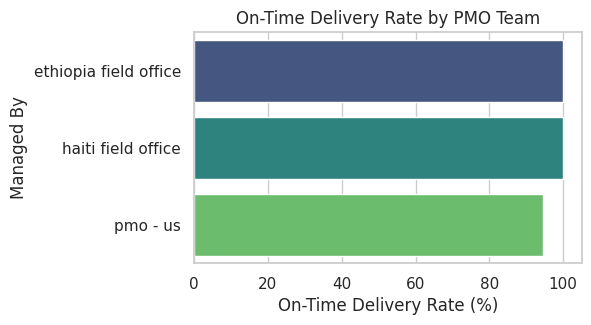

In [ ]:
# Create On-time delivery flag
df['On_Time'] = df['Delivered to Client Date'] <= df['Scheduled Delivery Date']

# Group by PMO team
on_time_by_team = df.groupby('Managed By')['On_Time'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(5, 3))
sns.barplot(x=on_time_by_team.values * 100, y=on_time_by_team.index, palette='viridis')
plt.xlabel("On-Time Delivery Rate (%)")
plt.title("On-Time Delivery Rate by PMO Team")
plt.show()


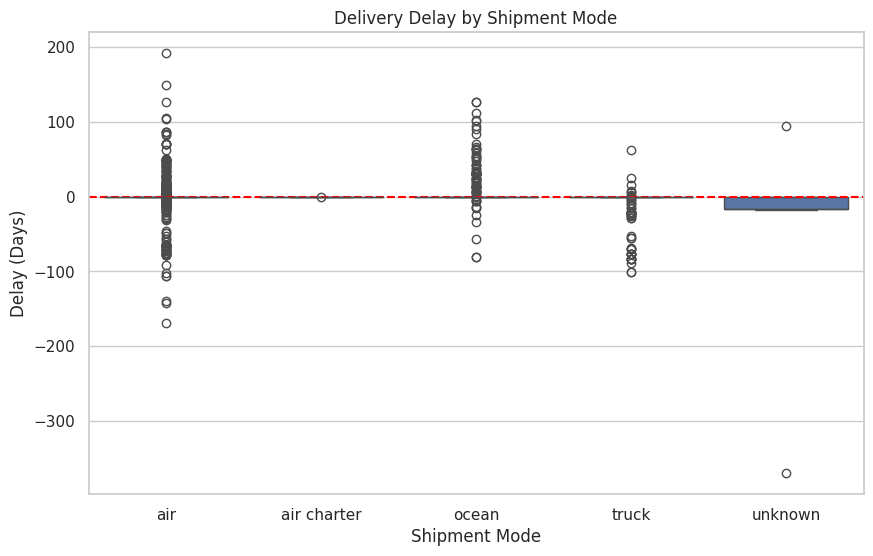

In [ ]:
# Calculate delivery delay in days
df['Delivery_Delay_Days'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipment Mode', y='Delivery_Delay_Days', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title("Delivery Delay by Shipment Mode")
plt.ylabel("Delay (Days)")
plt.show()


<ipython-input-29-73cb042b551b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_by_country.values, y=avg_delay_by_country.index, palette='mako')


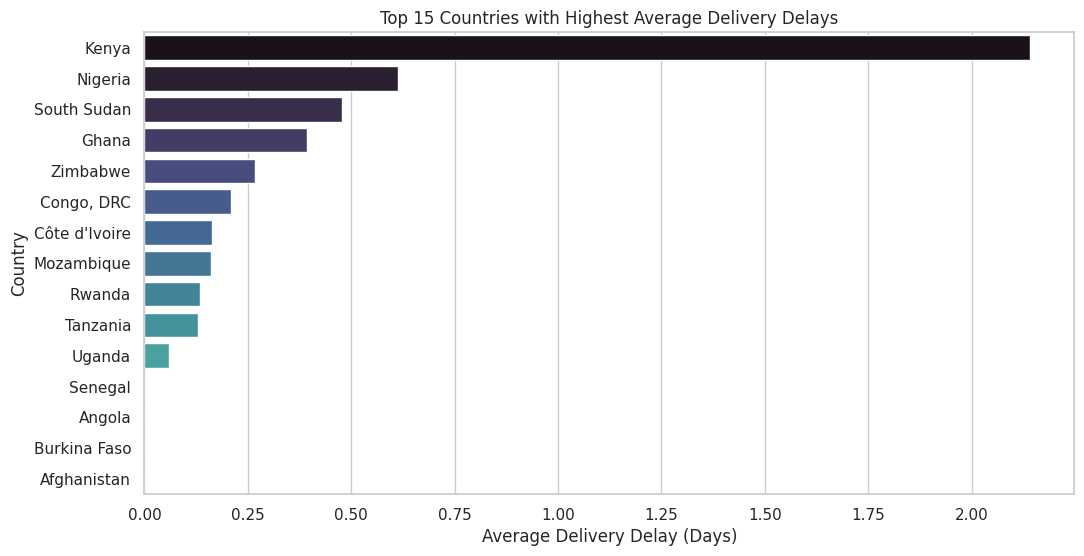

In [ ]:
avg_delay_by_country = df.groupby('Country')['Delivery_Delay_Days'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_country.values, y=avg_delay_by_country.index, palette='mako')
plt.xlabel("Average Delivery Delay (Days)")
plt.title("Top 15 Countries with Highest Average Delivery Delays")
plt.show()


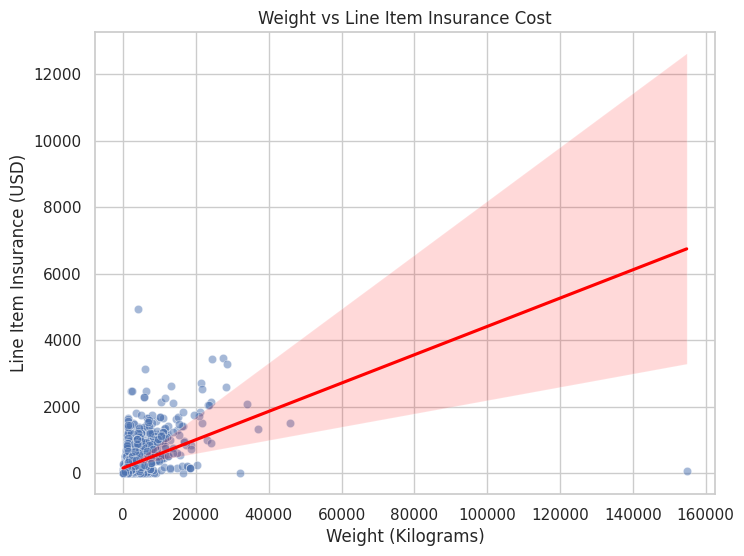

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight (Kilograms)', y='Line Item Insurance (USD)', alpha=0.5)
sns.regplot(data=df, x='Weight (Kilograms)', y='Line Item Insurance (USD)', scatter=False, color='red')
plt.title("Weight vs Line Item Insurance Cost")
plt.show()


<ipython-input-31-479290d2af43>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  on_time_by_inco = df.groupby('Vendor INCO Term')['On_Time'].mean().sort_values(ascending=False)
<ipython-input-31-479290d2af43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_by_inco.values * 100, y=on_time_by_inco.index, palette='coolwarm')


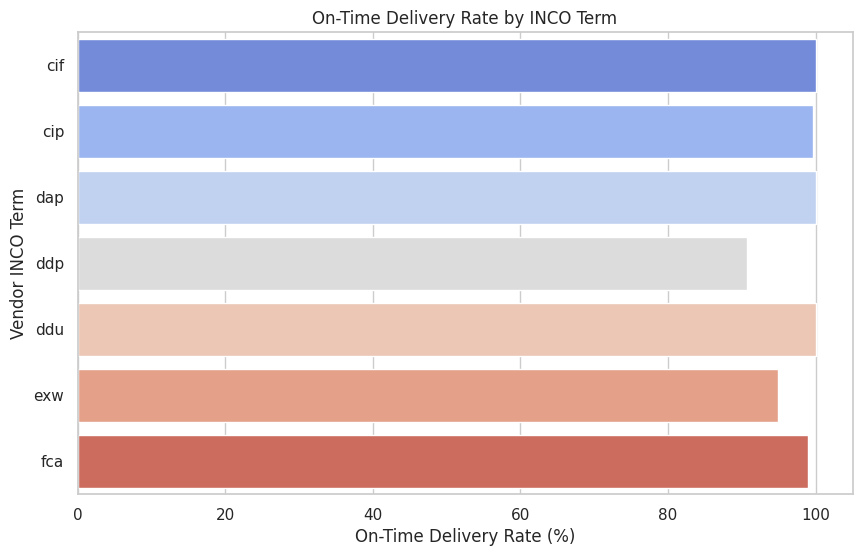

In [ ]:
on_time_by_inco = df.groupby('Vendor INCO Term')['On_Time'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_by_inco.values * 100, y=on_time_by_inco.index, palette='coolwarm')
plt.xlabel("On-Time Delivery Rate (%)")
plt.title("On-Time Delivery Rate by INCO Term")
plt.show()
